## Bibiliothèque

In [19]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from resnet import resnet_layer, resnet_v1
from Distiller import Distiller_AdaIn, Distiller
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import time

%matplotlib inline
seed = tf.random.set_seed(10)


## Utils

In [20]:
def plot_hist(hist, figname):
    #History
    plt.figure(figsize=(20,7))
    plt.subplot(121)
    plt.plot(hist.history['sparse_categorical_accuracy'], label = "train accur")
    plt.plot(hist.history['val_sparse_categorical_accuracy'], label = "Val accur")
    
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title("Accuracy")
    plt.grid()
    plt.legend()


    plt.subplot(122)
    plt.plot(hist.history['loss'], label = "Loss")
    plt.plot(hist.history['val_loss'], label = "Val loss")
    plt.xlabel('Epochs')
    plt.ylabel('Student Loss')
    plt.title("Loss")
    plt.grid()
    plt.legend()
    
    plt.savefig(figname)
    
    plt.show()

## Loading cifar10 Dataset

In [21]:
print("================ Data Loading ================")
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize data.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Data shapes
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("")

================ Data Loading ================
x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 1)
y_test shape: (10000, 1)



## Creating a data augmentation process

In [22]:
print("================ Building dataGen ================")
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
)

datagen.fit(x_train)

================ Building dataGen ================


## Building a preprocessing routine

In [23]:
print(" ============== Adding preprocessing layers ===============")
preprocessing = tf.keras.Sequential([
    tf.keras.layers.RandomCrop(32, 32, seed= seed),
    tf.keras.layers.RandomFlip(mode="horizontal", seed= seed),

])

 ============== Adding preprocessing layers ===============


## Building Resnet26 Teacher model 

In [24]:
print("============== Building Student Network Resnet8 ! =============")

teacher = resnet_v1(input_shape=(32, 32, 3), depth= 26)

teacher = tf.keras.Sequential([
    preprocessing,
    teacher,   
])


============== Building Student Network Resnet8 ! =============


## Building callbacks

In [25]:
model_save = tf.keras.callbacks.ModelCheckpoint(
    "/callback/callback_save",
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    save_weights_only=True,
    mode='auto',
    save_freq='epoch',
    options=None,
    initial_value_threshold=None,
)

lr_reduce = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='loss',
    factor=0.1,
    patience=10,
    verbose=1,
    mode='min',
    
    min_delta=0.0001,
    cooldown=0,
    min_lr=0.000001,
)

NAME = f"Resnet26_from_logits"
tensorboard = tf.keras.callbacks.TensorBoard(log_dir = f"logs/{NAME}", histogram_freq = 1)

## Teacher scratch training

In [26]:
BATCH_SIZE = 32
EPOCHS = 100
lr = 0.1


Epoch 1/100
1562/1562 [==============================] - 207s 129ms/step - loss: 1.9872 - sparse_categorical_accuracy: 0.3508 - val_loss: 2.1661 - val_sparse_categorical_accuracy: 0.3762 - lr: 0.1000
Epoch 2/100
1562/1562 [==============================] - 203s 130ms/step - loss: 1.4992 - sparse_categorical_accuracy: 0.5256 - val_loss: 1.4054 - val_sparse_categorical_accuracy: 0.5687 - lr: 0.1000
Epoch 3/100
1562/1562 [==============================] - 203s 130ms/step - loss: 1.2248 - sparse_categorical_accuracy: 0.6327 - val_loss: 1.7810 - val_sparse_categorical_accuracy: 0.5332 - lr: 0.1000
Epoch 4/100
1562/1562 [==============================] - 201s 128ms/step - loss: 1.0743 - sparse_categorical_accuracy: 0.6995 - val_loss: 1.2580 - val_sparse_categorical_accuracy: 0.6381 - lr: 0.1000
Epoch 5/100
1562/1562 [==============================] - 204s 130ms/step - loss: 1.0054 - sparse_categorical_accuracy: 0.7323 - val_loss: 1.3012 - val_sparse_categorical_accuracy: 0.6796 - lr: 0.1000


Epoch 42/100
1562/1562 [==============================] - 201s 129ms/step - loss: 0.8241 - sparse_categorical_accuracy: 0.8423 - val_loss: 1.4532 - val_sparse_categorical_accuracy: 0.6749 - lr: 0.1000
Epoch 43/100
1562/1562 [==============================] - 202s 130ms/step - loss: 0.8218 - sparse_categorical_accuracy: 0.8447 - val_loss: 1.1261 - val_sparse_categorical_accuracy: 0.7506 - lr: 0.1000
Epoch 44/100
1562/1562 [==============================] - 203s 130ms/step - loss: 0.8200 - sparse_categorical_accuracy: 0.8451 - val_loss: 1.1085 - val_sparse_categorical_accuracy: 0.7600 - lr: 0.1000
Epoch 45/100
1562/1562 [==============================] - 200s 128ms/step - loss: 0.8218 - sparse_categorical_accuracy: 0.8441 - val_loss: 1.0831 - val_sparse_categorical_accuracy: 0.7615 - lr: 0.1000
Epoch 46/100
1562/1562 [==============================] - 202s 129ms/step - loss: 0.8151 - sparse_categorical_accuracy: 0.8452 - val_loss: 1.2221 - val_sparse_categorical_accuracy: 0.7245 - lr: 0.

Epoch 82/100
1562/1562 [==============================] - 204s 131ms/step - loss: 0.3959 - sparse_categorical_accuracy: 0.9619 - val_loss: 0.6068 - val_sparse_categorical_accuracy: 0.8939 - lr: 0.0100
Epoch 83/100
1562/1562 [==============================] - 202s 129ms/step - loss: 0.3706 - sparse_categorical_accuracy: 0.9650 - val_loss: 0.5940 - val_sparse_categorical_accuracy: 0.8952 - lr: 0.0100
Epoch 84/100
1562/1562 [==============================] - 202s 129ms/step - loss: 0.3459 - sparse_categorical_accuracy: 0.9688 - val_loss: 0.5975 - val_sparse_categorical_accuracy: 0.8927 - lr: 0.0100
Epoch 85/100
1562/1562 [==============================] - 200s 128ms/step - loss: 0.3207 - sparse_categorical_accuracy: 0.9742 - val_loss: 0.5860 - val_sparse_categorical_accuracy: 0.8945 - lr: 0.0100
Epoch 86/100
1562/1562 [==============================] - 199s 128ms/step - loss: 0.3025 - sparse_categorical_accuracy: 0.9756 - val_loss: 0.5910 - val_sparse_categorical_accuracy: 0.8898 - lr: 0.

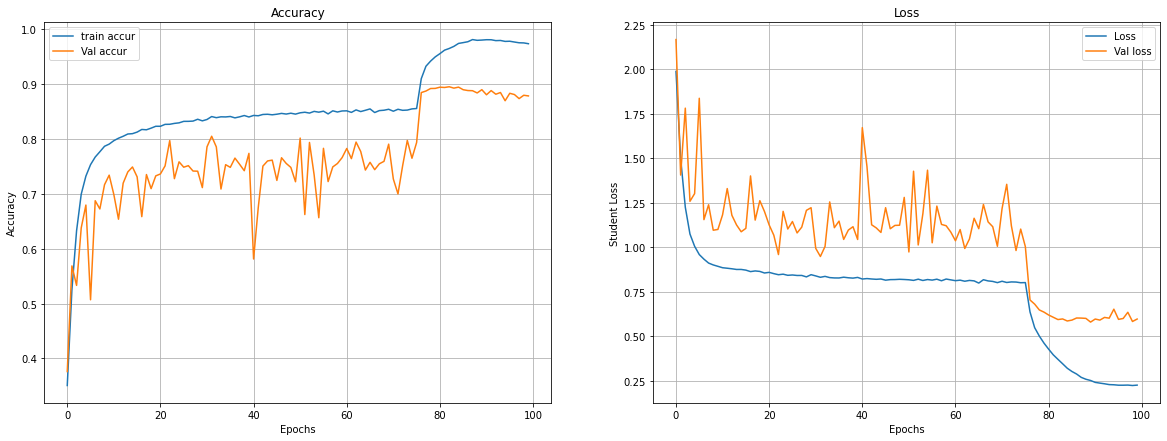

Saving model 


2022-05-04 15:33:27.343916: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: Resnet26_from_logits/assets
Saving Done !
Saving Weights 
Saving Done !

End !


In [27]:
teacher.compile(
        optimizer = tf.keras.optimizers.SGD(learning_rate=lr, momentum=0.9),
        metrics = [tf.keras.metrics.SparseCategoricalAccuracy()],
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
       )

    # Train and evaluate on data.
hist = teacher.fit(x_train, y_train, 
      batch_size = BATCH_SIZE,
      epochs=EPOCHS,
      steps_per_epoch = len(x_train)/BATCH_SIZE,
      validation_data =(x_test, y_test),
      workers =40,
      use_multiprocessing= True,
      callbacks = [lr_reduce, tensorboard],
      )


teacher.evaluate(x_test, y_test)
print("")

print(" =============== History Plot ===============")
plot_hist(hist, f"Resnet26_from_logits.png")


print("Saving model ")
teacher.save(f"Resnet26_from_logits")
print("Saving Done !")

print("Saving Weights ")
teacher.save_weights(f"Resnet26_from_logits.h5")
print("Saving Done !")
print("")

print("End !")

Epoch 1/250
1562/1562 [==============================] - 209s 133ms/step - loss: 0.2246 - sparse_categorical_accuracy: 0.9746 - val_loss: 0.6447 - val_sparse_categorical_accuracy: 0.8696 - lr: 0.0100
Epoch 2/250
1562/1562 [==============================] - 205s 131ms/step - loss: 0.2219 - sparse_categorical_accuracy: 0.9749 - val_loss: 0.5931 - val_sparse_categorical_accuracy: 0.8788 - lr: 0.0100
Epoch 3/250
1562/1562 [==============================] - 210s 134ms/step - loss: 0.2223 - sparse_categorical_accuracy: 0.9747 - val_loss: 0.6004 - val_sparse_categorical_accuracy: 0.8778 - lr: 0.0100
Epoch 4/250
1562/1562 [==============================] - 208s 133ms/step - loss: 0.2191 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.6036 - val_sparse_categorical_accuracy: 0.8751 - lr: 0.0100
Epoch 5/250
1562/1562 [==============================] - 208s 133ms/step - loss: 0.2187 - sparse_categorical_accuracy: 0.9754 - val_loss: 0.5937 - val_sparse_categorical_accuracy: 0.8795 - lr: 0.0100


Epoch 41/250
1562/1562 [==============================] - 200s 128ms/step - loss: 0.1527 - sparse_categorical_accuracy: 0.9991 - val_loss: 0.5285 - val_sparse_categorical_accuracy: 0.9043 - lr: 1.0000e-03
Epoch 42/250
1562/1562 [==============================] - 204s 131ms/step - loss: 0.1509 - sparse_categorical_accuracy: 0.9995 - val_loss: 0.5319 - val_sparse_categorical_accuracy: 0.9036 - lr: 1.0000e-03
Epoch 43/250
1562/1562 [==============================] - 201s 129ms/step - loss: 0.1499 - sparse_categorical_accuracy: 0.9993 - val_loss: 0.5306 - val_sparse_categorical_accuracy: 0.9041 - lr: 1.0000e-03
Epoch 44/250
1562/1562 [==============================] - 202s 130ms/step - loss: 0.1484 - sparse_categorical_accuracy: 0.9995 - val_loss: 0.5321 - val_sparse_categorical_accuracy: 0.9041 - lr: 1.0000e-03
Epoch 45/250
1562/1562 [==============================] - 204s 131ms/step - loss: 0.1473 - sparse_categorical_accuracy: 0.9995 - val_loss: 0.5323 - val_sparse_categorical_accuracy:

Epoch 81/250
1562/1562 [==============================] - 207s 132ms/step - loss: 0.1150 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.5382 - val_sparse_categorical_accuracy: 0.9050 - lr: 1.0000e-03
Epoch 82/250
1562/1562 [==============================] - 203s 130ms/step - loss: 0.1143 - sparse_categorical_accuracy: 0.9999 - val_loss: 0.5403 - val_sparse_categorical_accuracy: 0.9041 - lr: 1.0000e-03
Epoch 83/250
1562/1562 [==============================] - 201s 129ms/step - loss: 0.1136 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.5397 - val_sparse_categorical_accuracy: 0.9037 - lr: 1.0000e-03
Epoch 84/250
1562/1562 [==============================] - 206s 132ms/step - loss: 0.1129 - sparse_categorical_accuracy: 0.9999 - val_loss: 0.5394 - val_sparse_categorical_accuracy: 0.9051 - lr: 1.0000e-03
Epoch 85/250
1562/1562 [==============================] - 205s 131ms/step - loss: 0.1121 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.5399 - val_sparse_categorical_accuracy:

Epoch 121/250
1562/1562 [==============================] - 204s 131ms/step - loss: 0.0895 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.5379 - val_sparse_categorical_accuracy: 0.9052 - lr: 1.0000e-03
Epoch 122/250
1562/1562 [==============================] - 202s 129ms/step - loss: 0.0888 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.5345 - val_sparse_categorical_accuracy: 0.9047 - lr: 1.0000e-03
Epoch 123/250
1562/1562 [==============================] - 199s 127ms/step - loss: 0.0883 - sparse_categorical_accuracy: 0.9999 - val_loss: 0.5346 - val_sparse_categorical_accuracy: 0.9052 - lr: 1.0000e-03
Epoch 124/250
1562/1562 [==============================] - 200s 128ms/step - loss: 0.0878 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.5350 - val_sparse_categorical_accuracy: 0.9041 - lr: 1.0000e-03
Epoch 125/250
1562/1562 [==============================] - 203s 130ms/step - loss: 0.0873 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.5358 - val_sparse_categorical_accu

Epoch 161/250
1562/1562 [==============================] - 199s 127ms/step - loss: 0.0697 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.5299 - val_sparse_categorical_accuracy: 0.9045 - lr: 1.0000e-03
Epoch 162/250
1562/1562 [==============================] - 201s 128ms/step - loss: 0.0693 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.5285 - val_sparse_categorical_accuracy: 0.9044 - lr: 1.0000e-03
Epoch 163/250
1562/1562 [==============================] - 198s 127ms/step - loss: 0.0688 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.5292 - val_sparse_categorical_accuracy: 0.9050 - lr: 1.0000e-03
Epoch 164/250
1562/1562 [==============================] - 199s 127ms/step - loss: 0.0684 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.5300 - val_sparse_categorical_accuracy: 0.9052 - lr: 1.0000e-03
Epoch 165/250
1562/1562 [==============================] - 198s 127ms/step - loss: 0.0680 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.5306 - val_sparse_categorical_accu

Epoch 201/250
1562/1562 [==============================] - 199s 127ms/step - loss: 0.0545 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.5277 - val_sparse_categorical_accuracy: 0.9067 - lr: 1.0000e-03
Epoch 202/250
1562/1562 [==============================] - 198s 127ms/step - loss: 0.0542 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.5301 - val_sparse_categorical_accuracy: 0.9049 - lr: 1.0000e-03
Epoch 203/250
1562/1562 [==============================] - 199s 128ms/step - loss: 0.0537 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.5300 - val_sparse_categorical_accuracy: 0.9064 - lr: 1.0000e-03
Epoch 204/250
1562/1562 [==============================] - 197s 126ms/step - loss: 0.0534 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.5289 - val_sparse_categorical_accuracy: 0.9064 - lr: 1.0000e-03
Epoch 205/250
1562/1562 [==============================] - 200s 128ms/step - loss: 0.0531 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.5278 - val_sparse_categorical_accu

Epoch 241/250
1562/1562 [==============================] - 235s 150ms/step - loss: 0.0426 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.5296 - val_sparse_categorical_accuracy: 0.9050 - lr: 1.0000e-03
Epoch 242/250
1562/1562 [==============================] - 234s 149ms/step - loss: 0.0422 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.5305 - val_sparse_categorical_accuracy: 0.9055 - lr: 1.0000e-03
Epoch 243/250
1562/1562 [==============================] - 232s 148ms/step - loss: 0.0420 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.5332 - val_sparse_categorical_accuracy: 0.9048 - lr: 1.0000e-03
Epoch 244/250
1562/1562 [==============================] - 233s 149ms/step - loss: 0.0418 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.5278 - val_sparse_categorical_accuracy: 0.9059 - lr: 1.0000e-03
Epoch 245/250
1562/1562 [==============================] - 232s 149ms/step - loss: 0.0415 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.5262 - val_sparse_categorical_accu

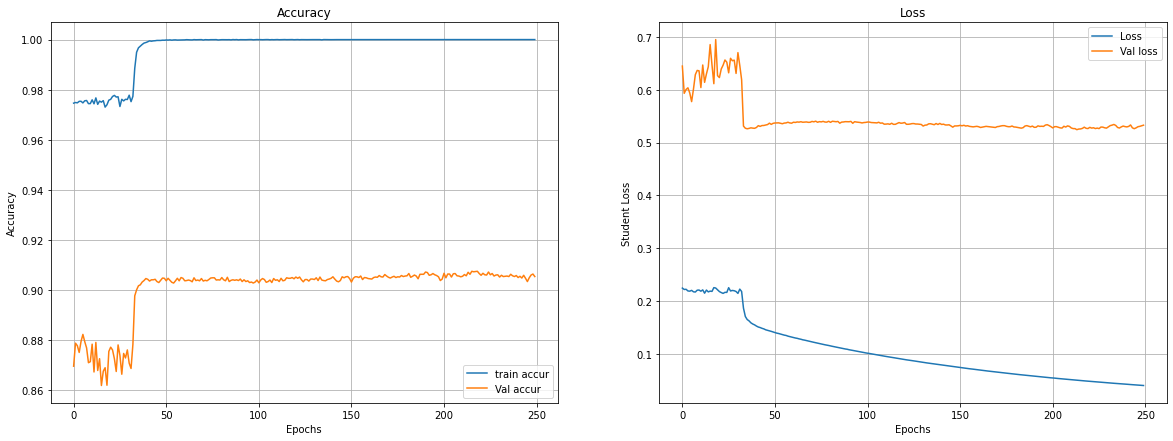

Saving model 
INFO:tensorflow:Assets written to: Resnet26_from_logits/assets
Saving Done !
Saving Weights 
Saving Done !

End !


In [28]:
tensorboard = tf.keras.callbacks.TensorBoard(log_dir = f"logs/{NAME}_suite", histogram_freq = 1)
EPOCHS = 250

    # Train and evaluate on data.
hist = teacher.fit(x_train, y_train, 
      batch_size = BATCH_SIZE,
      epochs=EPOCHS,
      steps_per_epoch = len(x_train)/BATCH_SIZE,
      validation_data =(x_test, y_test),
      workers =40,
      use_multiprocessing= True,
      callbacks = [lr_reduce, tensorboard],
      )


teacher.evaluate(x_test, y_test)
print("")

print(" =============== History Plot ===============")
plot_hist(hist, f"Resnet26_from_logits_suite.png")


print("Saving model ")
teacher.save(f"Resnet26_from_logits")
print("Saving Done !")

print("Saving Weights ")
teacher.save_weights(f"Resnet26_from_logits.h5")
print("Saving Done !")
print("")

print("End !")